#  Análise de Churn numa empresa de telecomunicações (MPV sprint 1/ PUC Rio)

### Introdução e descrição do problema.

A rentabilidade de um negócio depende muito de manter o cliente usando os serviços da empresa. Algo que pode ser difícil de obter no setor de telecomunicações. Devido a um mercado cada vez mais competitivo e à capacidade dos clientes de mudar para um novo   provedor em poucos minutos, a rotatividade dos clientes tornou-se o problema mais prevalecente dentro da indústria de telecomunicações. A taxa de evasão da base de clientes que cancelam um serviço em um determinado período é conhecido como Churn.

Churn é um problema para as empresas de telecomunicações porque reduz a receita e aumenta os custos de aquisição e retenção de clientes. Isto pode acontecer em qualquer negócio, mas é mais comumente visto e associado à indústria de telecomunicações, em grande parte porque é um setor baseado em assinaturas.

Churn pode ser influenciado por vários fatores, como o tipo de contrato, a forma de pagamento, o serviço de internet, o suporte técnico, a satisfação do cliente, entre outros. Este Churn pode ser previsto usando técnicas de machine learning que analisam os dados dos clientes e identificam padrões de comportamento e risco de cancelamento.
Com isto Churn pode ser reduzido com estratégias de fidelização, personalização, segmentação e comunicação com os clientes.


Para prevêr a probabilidade de um cliente fazer Churn será construido um modelo MVP Supervisionado: 
O MVP é construído a partir dos dados, que são apresentados na forma de pares ordenados (entrada — saída desejada). Os dados são rotulados, pois sabemos de antemão a saída esperada para cada entrada de dados.



## 0. Bibliotecas 

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt #criação de gráficos 
from scipy import stats # estatística 
from sklearn.preprocessing import StandardScaler # modelagem estatística. Padronização 
import warnings # tratamento de warnings 
warnings.filterwarnings("ignore")
from google.colab import drive

## 1. Análise de dados

In [56]:
# Montando o Google Drive
drive.mount('/content/drive')

# Definindo o caminho do arquivo CSV no Google Drive
file_path = '/content/drive/MyDrive/Churn.csv'

# Lendo o arquivo CSV em um DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') # carregando os dados do arquivo CSV e guardando-os no data frame df 

In [58]:
df.head() # Observando as 5 primeiras linhas do df 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df.columns.values # Observando as colunas do df. 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Definição dos atributos
**customerID**: Identificação do cliente

**Gender:** Qual o gênero do cliente

**SeniorCitizen:** Informa se o cliente é idoso

**Partner:** Informa se o cliente tem parceiro 

**Dependents:** Informa se o clientes tem dependentes

**Tenure:** Informa há quanto tempo os clientes estão na empresa (em meses)

**PhoneService:** Informa se o cliente tem serviço telefonico

**MultipleLines:** Informa se o  cliente tem várias linhas

**InternetService:** Informa se o cliente tem serviço de internet

**OnlineSecurity:** Informa se o cliente tem segurança online

**OnlineBackup:** Informa se o cliente tem serviço de backup online

**DeviceProtection:** Informa se o cliente tem seguro de proteção do aparelho

**TechSupport:**  Informa se o cliente tem suporte técnico

**StreamingTV:** Informa se o cliente tem tvstreming 

**StreamingMovies:** Informa se o cliente tem StreamMovies

**Contract:** Informa o tipo de contrato de cliente

**PaperlessBilling:** Informa se o cliente recebe boleto digital 

**PaymentMethod:** Informa o método de pagamento do cliente 

**MonthlyCharges:** Valor que o cliente paga mensalmente

**TotalCharges:** Valor total de cobranças de cada cliente desde que foi para a empresa.

**Churn:** Informa se o cliente fez Churn


## 1.1 Estatísticas descritivas 

### 1.1.1 Atributos e instâncias 

In [60]:
df.shape # forma do data frame. 1 numero = n. de linhas e 2 n. = numero de colunas 

(7043, 21)

 O numero de atributos no data frame df = 21 atributos. Tem 7043 linhas.

In [61]:
isinstance(df,object) # foram identificadas 9 instancias (np,pd,sns,plt,df,mtick,stats,StandardScaler,warnings)

True

### 1.1.2 Tipos de dados dos atributos 

In [62]:
df.dtypes # Estamos observando os tipos de atributo.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Dos 21 atributos 2 são do tipo int64, 1 atributo é do tipo float64 e 18 atributos são object

### 1.1.3 Primeiras linhas do data set 

In [63]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- Nas primeiras linhas de algumas colunas, se verifica o mesmo valor (colunas constantes?)
- Nem todas as colunas aparecem na visualização

### 1.1.4 Valores faltantes, discrepantes ou inconsistentes 

In [64]:
df.isnull().sum()/len(df) # Calculando o percentual de nulls de cada atributo. 

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

- Não foi identificado nenhum dado faltante 

In [65]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce") # convertendo total charges para numerico, pois estava em object.

In [66]:
df[["TotalCharges", "MonthlyCharges"]].describe() # Vizualizando as estatísticas de TotalCharges e MonthlyCharges.

,TotalCharges,MonthlyCharges
count,7032.000000,7043.000000
mean,2283.300441,64.761692
std,2266.771362,30.090047
min,18.800000,18.250000
25%,401.450000,35.500000
50%,1397.475000,70.350000
75%,3794.737500,89.850000
max,8684.800000,118.750000


In [100]:
Churn_count=df["Churn"].value_counts() # Contabilizando o número de churn no dataframe.
Churn_percentages = Churn_count / len(df) * 100
churn_summary = pd.DataFrame({'count': Churn_count, 'percentage': Churn_percentages})
print(churn_summary) 

     count  percentage
No    5174   73.463013
Yes   1869   26.536987


Observamos que 73,5% da base não fez churn e 26,5% fez churn. Para a futura criação de um modelo provavelmente vamos precisar fazer um balanciamento.

In [67]:
clients=df["gender"].value_counts() # Contabilizando o número de clientes por gênero.
clients 

Male      3555
Female    3488
Name: gender, dtype: int64

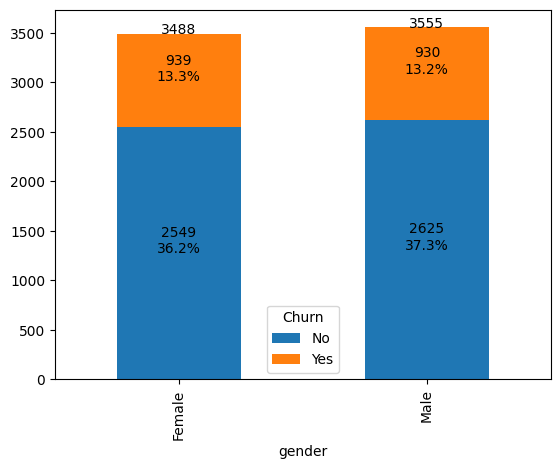

In [68]:
# Agrupando os clientes pelas colunas 'gender' e 'churn'. 
grouped = df.groupby(['gender', 'Churn']).size().unstack()

ax = grouped.plot(kind='bar', stacked=True)

# Adicionando os números e porcentagens nas barras
totals = [0] * len(grouped)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f}\n{:.1%}'.format(height, height/df.shape[0]), ha='center')
    totals[i % len(grouped)] += height
    
# Adicionando o valor total em cada coluna
for i, total in enumerate(totals):
    ax.text(i, total, '{:.0f}'.format(total), ha='center')
plt.show()

 Não foi observado diferenças no churn nos diferentes gêneros 

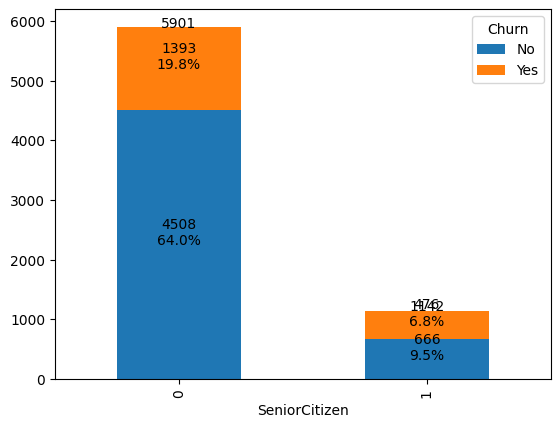

In [69]:
# Agrupando os clientes pelas colunas 'SeniorCitizen' e 'churn'. 
grouped_sc = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = grouped_sc.plot(kind='bar', stacked=True)

# Adicionando os números e porcentagens nas barras
totals = [0] * len(grouped_sc)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f}\n{:.1%}'.format(height, height/df.shape[0]), ha='center')
    totals[i % len(grouped_sc)] += height
    
# Adicionando o valor total em cada coluna
for i, total in enumerate(totals):
    ax.text(i, total, '{:.0f}'.format(total), ha='center')
plt.show()

Idosos tem o menor numero de Churn na base, embora o percentual dentro da coluna pareça ser maior. 

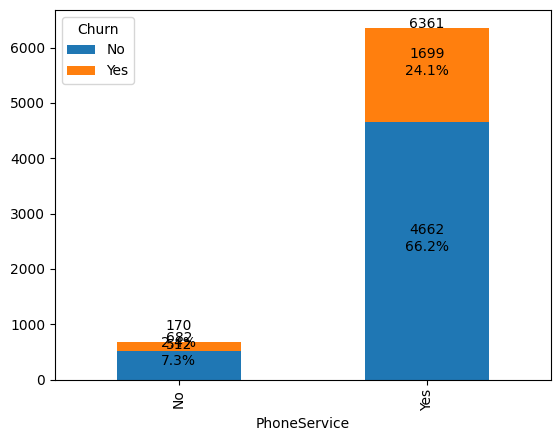

In [70]:

# Agrupando os clientes pelas colunas 'PhoneService' e 'churn'.
grouped_ps = df.groupby(['PhoneService', 'Churn']).size().unstack()

ax = grouped_ps.plot(kind='bar', stacked=True)

# Adicionando os números e porcentagens nas barras
totals = [0] * len(grouped_ps)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f}\n{:.1%}'.format(height, height/df.shape[0]), ha='center')
    totals[i % len(grouped_ps)] += height
    
# Adicionando o valor total em cada coluna
for i, total in enumerate(totals):
    ax.text(i, total, '{:.0f}'.format(total), ha='center')
plt.show()



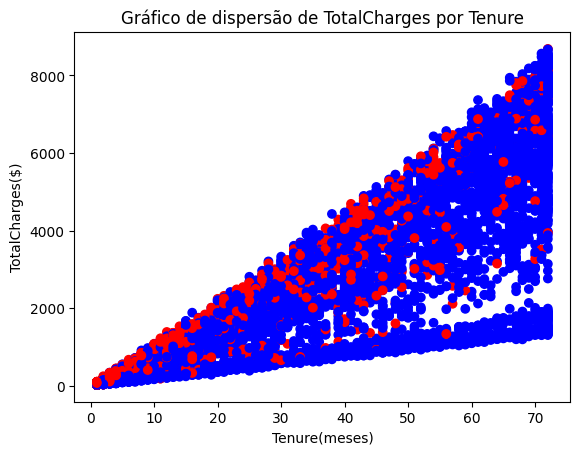

In [71]:
# Criando um scatter plot com as colunas 'TotalCharges', 'Churn' e 'tenure'
colors = {'Yes': 'red', 'No': 'blue'}
plt.scatter(df['tenure'], df['TotalCharges'], c=df['Churn'].map(colors))

# Adicionando título e rótulos aos eixos
plt.title('Gráfico de dispersão de TotalCharges por Tenure')
plt.xlabel('Tenure(meses)')
plt.ylabel('TotalCharges($)')
plt.show()

 Foi observado que para valores fixos de Tenure, a maior taxa de Churn se concentra em valores maiores de TotalCharges.Por isso foi possivel observar maior concentração de pontos na diagonal de cima do gráfico.

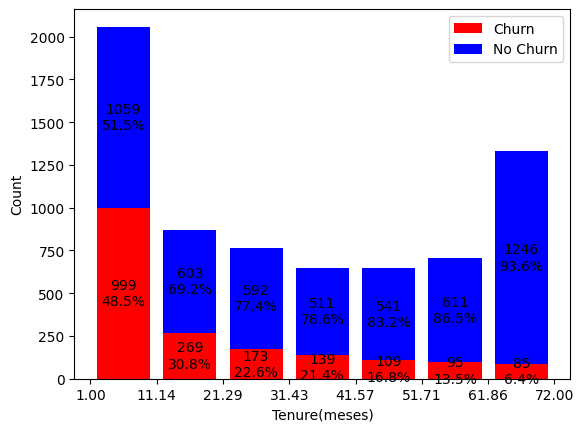

In [72]:
# Calculate the histogram values for Churn and No Churn
churn_counts, bin_edges = np.histogram(df.loc[df['Churn'] == 'Yes', 'tenure'], bins=7)
no_churn_counts, _ = np.histogram(df.loc[df['Churn'] == 'No', 'tenure'], bins=bin_edges)

# Plot the stacked histogram
plt.hist([df.loc[df['Churn'] == 'Yes', 'tenure'], df.loc[df['Churn'] == 'No', 'tenure']], stacked=True, color=['red', 'blue'], label=['Churn', 'No Churn'], bins=bin_edges, rwidth=0.8)
plt.xticks(bin_edges)
plt.legend()

# Add text annotations
for i in range(len(churn_counts)):
    x = (bin_edges[i] + bin_edges[i+1]) / 2
    y1 = churn_counts[i]
    y2 = no_churn_counts[i]
    total = y1 + y2
    percentage1 = y1 / total * 100
    percentage2 = y2 / total * 100
    plt.text(x, y1/2, f'{y1}\n{percentage1:.1f}%', ha='center', va='center')
    plt.text(x, y1+y2/2, f'{y2}\n{percentage2:.1f}%', ha='center', va='center')

plt.xlabel('Tenure(meses)')
plt.ylabel('Count')
plt.show()

Foi observado que para valores menores de tenure (clientes novos) existe um maior volume de Churn. 

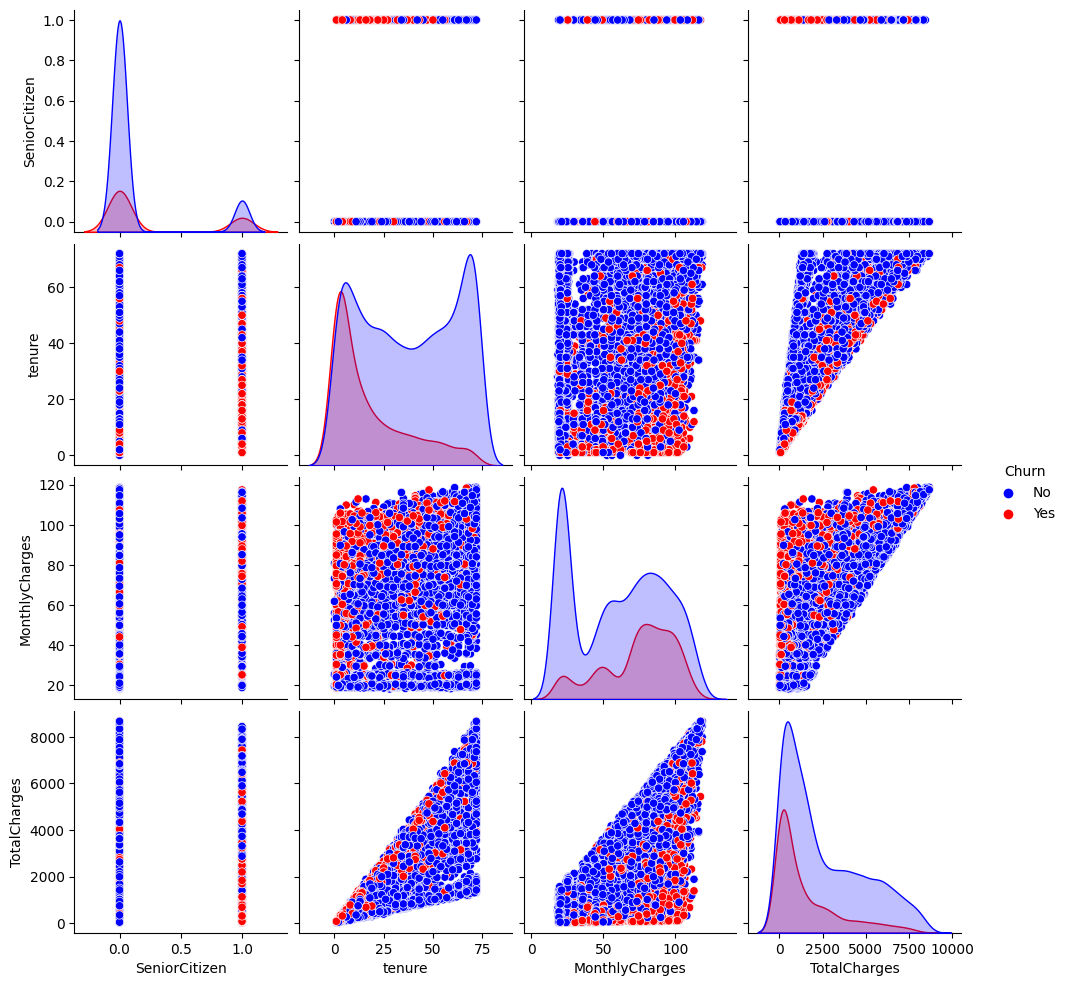

In [73]:
# Selecionando só as colunas numéricas do DataFrame
numeric_columns = df.select_dtypes(include=np.number).columns

# Creando um pairplot com hue sendo a coluna de churn
sns.pairplot(df, hue='Churn', vars=numeric_columns, palette={'Yes': 'red', 'No': 'blue'})

plt.show()

Nos gráficos acima podemos observar as relações entre os diferentes pares de variáveis no nosso dataset. 

In [74]:
Internet=df["InternetService"].value_counts() #contabilizando numero de clients por serviço de internet 
Internet

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

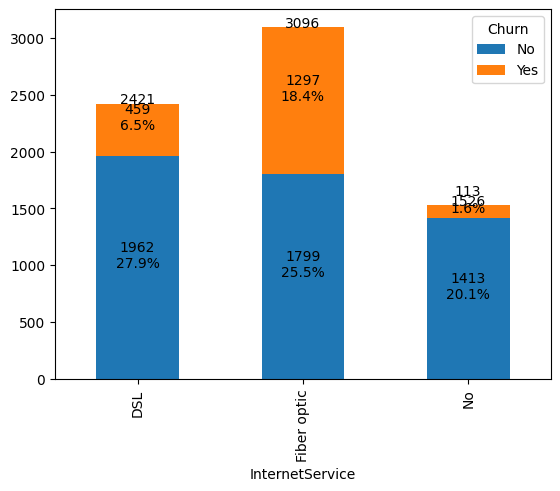

In [75]:
#  Agrupando os clientes pelas colunas 'InternetService' e 'churn'
grouped_Is = df.groupby(['InternetService', 'Churn']).size().unstack()

ax = grouped_Is.plot(kind='bar', stacked=True)

# Adicionando os números e porcentagens nas barras
totals = [0] * len(grouped_Is)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f}\n{:.1%}'.format(height, height/df.shape[0]), ha='center')
    totals[i % len(grouped_Is)] += height
    
# Adicionando o valor total em cada coluna
for i, total in enumerate(totals):
    ax.text(i, total, '{:.0f}'.format(total), ha='center')
plt.show()

O maior volume e taxa de Churn estão concentrados nos clientes que tem serviço de internet por fibra ótica. 

# 2. Pré-processamento de dados

## 2.1 Limpeza de dados

### 2.1.1 Dados duplicados 

In [76]:
num_duplicates = df.duplicated().sum() # Determinando quantidade de linhas duplicadas 
print(f'Número de linhas duplicadas: {num_duplicates}')

Número de linhas duplicadas: 0


### 2.1.2 Dados nulos 

In [77]:
null_counts = df.isnull().sum() # Determinando a quantidade de valores nulls por coluna. 
print(null_counts) 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Percebemos que todas as variáveis estão totalmente preenchidas, exceto TotalCharges, que tem 11 clientes com valores faltantes. 

In [78]:
null_rows = df[df['TotalCharges'].isnull()] # Visualizando as linhas que tem os valores de TotalCharge null. 
print(null_rows)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

Nos dados acima podemos observar as linhas onde total charges é NULL. Será que tem relação com uma outra variável? (tenure, MonthlyCharges)

In [79]:
selected_columns = df[['tenure', 'MonthlyCharges', 'TotalCharges']] # Explorando a relação entre tenure, MonthlyCharges e TotalCharges.
print(selected_columns)

      tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
2          2           53.85        108.15
3         45           42.30       1840.75
4          2           70.70        151.65
...      ...             ...           ...
7038      24           84.80       1990.50
7039      72          103.20       7362.90
7040      11           29.60        346.45
7041       4           74.40        306.60
7042      66          105.65       6844.50

[7043 rows x 3 columns]


Percebemos que tem relação, quando cliente tem tenure = 1 o valor de MonthlyCharges é igual a TotalCharges.
Quando são diferentes pode ser devido a cobranças extras ex: ( juros, mais Gb,cobrança indevida ou mudança de plano). Será que total charges Null é por causa do cliente ser novo?

In [80]:
selected_rows = df[(df['tenure'] == 0)] # Visualizando as linhas correspondentes a clientes novos.
selected_columns = selected_rows[['tenure', 'MonthlyCharges', 'TotalCharges']]
print(selected_columns)

      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


Os clientes que estão com totalcharge null, são clientes que são novos na companhia, por isso ainda não foram devidamente cobrados pela empresa. Por isso vamos desconsiderar na nossa base de dados.

In [81]:
df1 = df[df['TotalCharges'].notnull()] # Eliminando da base as linhas com TotalCharge igual a null.
df1.shape

(7032, 21)

In [82]:
df.shape # Diferença das 11 linhas entre df(7043) e df1(7032)

(7043, 21)

### 2.1.3 Verificação de tipos de dados

In [83]:
print(df1.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [84]:
print(df1["Churn"].unique())

['No' 'Yes']


Todas as variáveis tem um formato correto de dados.

### 2.1.4 Tratamento de outliers 

In [85]:
cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] # Colunas para considerar
z_scores = np.abs(stats.zscore(df1[cols])) # Padronizando df1.

threshold = 3 # Tomando 3 desvios padrões como limiar para considerar um valor como outlier.
outliers = df1[(z_scores > threshold).any(axis=1)]
print(outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


O data set não tem outliers

## 2.2 Transformação de dados

### 2.2.1 Padronização de valores

In [86]:
df2=df1.copy()

In [87]:
scaler = StandardScaler() # Definindo Scaler para padronizar os dados.
df_numeric = df2.select_dtypes(include='number') # Considerando apenas colunas numericas. 
df2[df_numeric.columns] = scaler.fit_transform(df_numeric)

As colunas numéricas ficaram padronizadas, utilizando a distribuição padrão.

In [88]:
print(df2)

      customerID  gender  SeniorCitizen Partner Dependents    tenure  \
0     7590-VHVEG  Female      -0.440327     Yes         No -1.280248   
1     5575-GNVDE    Male      -0.440327      No         No  0.064303   
2     3668-QPYBK    Male      -0.440327      No         No -1.239504   
3     7795-CFOCW    Male      -0.440327      No         No  0.512486   
4     9237-HQITU  Female      -0.440327      No         No -1.239504   
...          ...     ...            ...     ...        ...       ...   
7038  6840-RESVB    Male      -0.440327     Yes        Yes -0.343137   
7039  2234-XADUH  Female      -0.440327     Yes        Yes  1.612573   
7040  4801-JZAZL  Female      -0.440327     Yes        Yes -0.872808   
7041  8361-LTMKD    Male       2.271039     Yes         No -1.158016   
7042  3186-AJIEK    Male      -0.440327      No         No  1.368109   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL         

### 2.2.2 One-hot-encoding

In [89]:
df3=df2.copy()

In [90]:
df_encoded = pd.get_dummies(df3,columns=['gender',"StreamingMovies",'StreamingTV',"TechSupport",'DeviceProtection','OnlineBackup',"MultipleLines","InternetService",'Contract',"PaymentMethod","OnlineSecurity"])

Usando one-hot-encoding para criar colunas dummies apartir de algumas variáveis.

In [91]:
df3["MultipleLines"].unique() # Verificando valores únicos de uma variável.

array(['No phone service', 'No', 'Yes'], dtype=object)

In [92]:
df_encoded.columns # Visualizando as colunas de df_encoded

Index(['customerID', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Female', 'gender_Male', 'StreamingMovies_No',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_El

In [93]:
df_encoded2 = df_encoded.replace({'Yes': 1, 'No': 0}) # Substituindo valores Yes e No por 1 e 0 respetivamente em algumas colunas.

In [94]:
print(df_encoded2)

      customerID  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0     7590-VHVEG      -0.440327        1           0 -1.280248             0   
1     5575-GNVDE      -0.440327        0           0  0.064303             1   
2     3668-QPYBK      -0.440327        0           0 -1.239504             1   
3     7795-CFOCW      -0.440327        0           0  0.512486             0   
4     9237-HQITU      -0.440327        0           0 -1.239504             1   
...          ...            ...      ...         ...       ...           ...   
7038  6840-RESVB      -0.440327        1           1 -0.343137             1   
7039  2234-XADUH      -0.440327        1           1  1.612573             1   
7040  4801-JZAZL      -0.440327        1           1 -0.872808             0   
7041  8361-LTMKD       2.271039        1           0 -1.158016             1   
7042  3186-AJIEK      -0.440327        0           0  1.368109             1   

      PaperlessBilling  MonthlyCharges 

In [95]:
df_encoded2.dtypes # Verificando tipos de variáveis 

customerID                                  object
SeniorCitizen                              float64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
StreamingMovies_No                           uint8
StreamingMovies_No internet service          uint8
StreamingMovies_Yes                          uint8
StreamingTV_No                               uint8
StreamingTV_No internet service              uint8
StreamingTV_Yes                              uint8
TechSupport_No                               uint8
TechSupport_No internet service

Se tiver alguma coluna objeto que não seja CustomerID será convertida a inteiro

In [96]:
df_object = df_encoded2.select_dtypes(include='object')
cols = df_object.columns.drop('customerID')
df_encoded2[cols] = df_encoded2.loc[:, cols].astype(int)


In [97]:
print(cols)

Index([], dtype='object')


In [98]:
print(df_encoded2)

      customerID  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0     7590-VHVEG      -0.440327        1           0 -1.280248             0   
1     5575-GNVDE      -0.440327        0           0  0.064303             1   
2     3668-QPYBK      -0.440327        0           0 -1.239504             1   
3     7795-CFOCW      -0.440327        0           0  0.512486             0   
4     9237-HQITU      -0.440327        0           0 -1.239504             1   
...          ...            ...      ...         ...       ...           ...   
7038  6840-RESVB      -0.440327        1           1 -0.343137             1   
7039  2234-XADUH      -0.440327        1           1  1.612573             1   
7040  4801-JZAZL      -0.440327        1           1 -0.872808             0   
7041  8361-LTMKD       2.271039        1           0 -1.158016             1   
7042  3186-AJIEK      -0.440327        0           0  1.368109             1   

      PaperlessBilling  MonthlyCharges 